# 사전과제 3
- 보스턴 지역의 지역별 집값에 영향을 미치는 요인을 정리한 데이터를 기반으로, 각 속성이 집 값에 미치는 영향을 분석해보려고 합니다. 아래 링크의 데이터 셋을 이용해서 보스턴의 집값에 영향을 미치는 Feature 들을 조합해서 각 지역의 집값(​MEDV)​을 예측하는 모델을 만들고, 해당 내용을 리포트로 작성해주세요.
- 데이터 탐색 과정, Feature 선정 과정, 예측 모형 학습과정 및 Evaluation 결과, 고려사항 등을 리포트에 포함시켜 주세요.

In [1]:
#데이터 불러오기
import numpy as np
import pandas as pd

file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)

#데이터 확인
boston #506개의 행, 14개의 열 중 결과값은 MEDV(집값)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
#데이터 확인2 - 혹시 null값이 있는 데이터는 없는가? 없음
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
#데이터 분포 확인
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1. 전체 13개 Feature을 대상으로 모델을 만들고 학습

In [4]:
#데이터 쉐이프 확인
print(np.shape(boston))

(506, 14)


In [5]:
#이 506행의 전 Feature를 대상으로 80%를 학습, 20%로 평가해보자
from sklearn.model_selection import train_test_split

x = boston.iloc[:,0:13]
y = boston['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)  

In [6]:
#모델 만들기
#데이터의 사이즈가 작고 (총 506)개 이므로 단순하므로 은닉층의 수를 줄여 overfit을 피한다. 
#활성화 함수로는 ReLu(Rectified Linear Unit)사용
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13,))) #13개의 input에서 64개의 output을 갖는 입력층
model.add(layers.Dense(32, activation='relu')) #64개의 input에서 32개의 output을 갖는 은닉층
model.add(layers.Dense(1)) #1개의 결과를 내는 출력층

In [7]:
#모델 컴파일링 
#최적화 함수로는 학습률 0.001의 Adam 사용
#손실 함수로는 MSE 함수, 평가 지표로는 MAE를 사용

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

- 손실함수 MSE : Mean Square Error, 평균제곱오차 
- 평가지표 MAR : Mean Absolute Error, 평균절대오차

In [8]:
#데이터를 학습시키기 이해 모두 array로 변환
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [9]:
#학습

from keras.callbacks import EarlyStopping 
#지정한 epoch만큼 반복하는 동안 학습 오차에 개선이 없다면 자동으로 학습을 종료

early_stop = EarlyStopping(monitor='val_loss', patience=20) #val_loss를 모니터링하여 20번의 epoch동안 개선이 없다면 종료
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 12ms/step - loss: 907.4947 - mae: 23.7331 - val_loss: 453.6163 - val_mae: 17.6893
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 225.9256 - mae: 11.7614 - val_loss: 127.3495 - val_mae: 8.7484
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 122.6501 - mae: 8.5200 - val_loss: 71.1380 - val_mae: 5.5907
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 75.2918 - mae: 6.0892 - val_loss: 72.7213 - val_mae: 6.6209
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 65.4627 - mae: 6.0041 - val_loss: 64.8963 - val_mae: 5.5951
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 60.8569 - mae: 5.4956 - val_loss: 63.4877 - val_mae: 5.7302
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 60.0327 - mae: 5.5154 - val_loss: 62.3031 - val_mae: 5.6972
Epoch 8/500
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 4ms/step - loss: 22.0566 - mae: 3.4656 - val_loss: 32.6198 - val_mae: 3.8519
Epoch 124/500
13/13 [==============================] - 0s 4ms/step - loss: 22.1662 - mae: 3.4548 - val_loss: 32.4036 - val_mae: 3.7945
Epoch 125/500
13/13 [==============================] - 0s 3ms/step - loss: 21.9736 - mae: 3.3815 - val_loss: 29.2230 - val_mae: 3.8593
Epoch 126/500
13/13 [==============================] - 0s 4ms/step - loss: 21.2242 - mae: 3.3238 - val_loss: 28.5038 - val_mae: 3.7557
Epoch 127/500
13/13 [==============================] - 0s 3ms/step - loss: 21.6461 - mae: 3.3822 - val_loss: 28.7351 - val_mae: 3.7777
Epoch 128/500
13/13 [==============================] - 0s 3ms/step - loss: 22.6063 - mae: 3.5152 - val_loss: 29.2076 - val_mae: 3.8748
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 22.5866 - mae: 3.4718 - val_loss: 30.9691 - val_mae: 3.7401
Epoch 130/500
13/13 [==============================] - 0s 3ms/step - 

Epoch 184/500
13/13 [==============================] - 0s 3ms/step - loss: 16.6351 - mae: 3.0402 - val_loss: 25.8650 - val_mae: 3.6432
Epoch 185/500
13/13 [==============================] - 0s 4ms/step - loss: 17.0595 - mae: 3.0475 - val_loss: 29.5706 - val_mae: 4.3571
Epoch 186/500
13/13 [==============================] - 0s 4ms/step - loss: 20.9973 - mae: 3.5509 - val_loss: 37.9858 - val_mae: 4.3139
Epoch 187/500
13/13 [==============================] - 0s 4ms/step - loss: 19.5066 - mae: 3.3603 - val_loss: 25.9288 - val_mae: 3.7234
Epoch 188/500
13/13 [==============================] - 0s 3ms/step - loss: 15.9832 - mae: 2.9454 - val_loss: 24.1157 - val_mae: 3.5327
Epoch 189/500
13/13 [==============================] - 0s 3ms/step - loss: 16.5265 - mae: 3.0229 - val_loss: 27.2628 - val_mae: 3.6662
Epoch 190/500
13/13 [==============================] - 0s 4ms/step - loss: 16.9657 - mae: 3.0443 - val_loss: 24.6446 - val_mae: 3.5361
Epoch 191/500
13/13 [==============================] - 

In [10]:
#결과 확인
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 24.4815 - mae: 3.6723


[24.481508255004883, 3.6723477840423584]

### 217번의 학습으로 테스트 결과가 실제값 보다 약 $3,672정도의 오차를 갖는 모델 생성

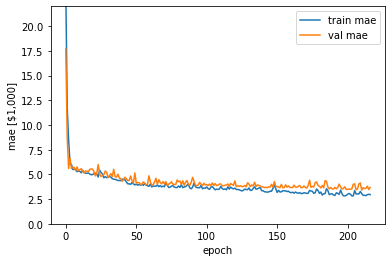

In [11]:
#학습과정 그래프
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

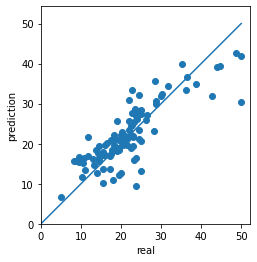

In [12]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])

### 2. 각각 Feature들 값의 범위가 다르므로 데이터 표준화를 해본다.

In [13]:
#데이터 표준화 
#서로 다른 범위를 갖고 있다면, 직접적인 비교가 어렵기 때문에 이를 동일한 범위를 갖도록 해주는 작업
#평균 0, 표준편차 1로 정규화

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train =  (x_train - mean) / std
x_test =  (x_test - mean) / std #학습데이터를 가지고 계산한 평균과 표준편차를 사용하여 평가 데이터 표준화에도 사용

In [14]:
#모델링 (위와 같음)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [15]:
#학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 581.5112 - mae: 22.1854 - val_loss: 523.6572 - val_mae: 21.0057
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 543.0671 - mae: 21.2649 - val_loss: 489.2045 - val_mae: 20.0990
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 500.5293 - mae: 20.2026 - val_loss: 447.1429 - val_mae: 18.9828
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 446.2608 - mae: 18.8396 - val_loss: 393.9870 - val_mae: 17.5213
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 379.4525 - mae: 17.0843 - val_loss: 328.0811 - val_mae: 15.6750
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 300.3950 - mae: 14.8653 - val_loss: 252.4475 - val_mae: 13.4056
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 214.2859 - mae: 12.1216 - val_loss: 180.6780 - val_mae: 10.9827
Epoch 8/500
13/13 [=====================

13/13 [==============================] - 0s 6ms/step - loss: 9.2125 - mae: 2.1387 - val_loss: 15.5450 - val_mae: 2.9662
Epoch 63/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1436 - mae: 2.1330 - val_loss: 15.5878 - val_mae: 2.9652
Epoch 64/500
13/13 [==============================] - 0s 5ms/step - loss: 9.0757 - mae: 2.1249 - val_loss: 15.6543 - val_mae: 2.9711
Epoch 65/500
13/13 [==============================] - 0s 6ms/step - loss: 9.1231 - mae: 2.1292 - val_loss: 15.5764 - val_mae: 2.9630
Epoch 66/500
13/13 [==============================] - 0s 6ms/step - loss: 8.8765 - mae: 2.1045 - val_loss: 15.4527 - val_mae: 2.9558
Epoch 67/500
13/13 [==============================] - 0s 4ms/step - loss: 8.8309 - mae: 2.0997 - val_loss: 15.4598 - val_mae: 2.9505
Epoch 68/500
13/13 [==============================] - 0s 4ms/step - loss: 8.7649 - mae: 2.0827 - val_loss: 15.4227 - val_mae: 2.9449
Epoch 69/500
13/13 [==============================] - 0s 4ms/step - loss: 8.6999 -

Epoch 184/500
13/13 [==============================] - 0s 7ms/step - loss: 4.0726 - mae: 1.4621 - val_loss: 12.8543 - val_mae: 2.6211
Epoch 185/500
13/13 [==============================] - 0s 5ms/step - loss: 4.0357 - mae: 1.4603 - val_loss: 13.2623 - val_mae: 2.6701
Epoch 186/500
13/13 [==============================] - 0s 6ms/step - loss: 4.0058 - mae: 1.4408 - val_loss: 12.9711 - val_mae: 2.6305
Epoch 187/500
13/13 [==============================] - 0s 6ms/step - loss: 3.9895 - mae: 1.4513 - val_loss: 13.0808 - val_mae: 2.6247
Epoch 188/500
13/13 [==============================] - 0s 5ms/step - loss: 3.9527 - mae: 1.4404 - val_loss: 12.8792 - val_mae: 2.6188
Epoch 189/500
13/13 [==============================] - 0s 5ms/step - loss: 3.9839 - mae: 1.4457 - val_loss: 13.1085 - val_mae: 2.6541
Epoch 190/500
13/13 [==============================] - 0s 5ms/step - loss: 4.0007 - mae: 1.4462 - val_loss: 12.9780 - val_mae: 2.6153
Epoch 191/500
13/13 [==============================] - 0s 6ms/

In [16]:
#모델 평가
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 13.0383 - mae: 2.6358


[13.038330078125, 2.635821580886841]

### 같은 방법으로 학습 후, 테스트 결과가 실제값 보다 약 $2,636정도의 오차를 갖는 더 좋은 성능의 모델 생성    

### 표준화된 모델의 성능이 더 좋은것을 확인

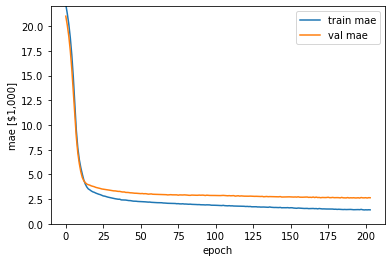

In [17]:
#학습과정 그래프
plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

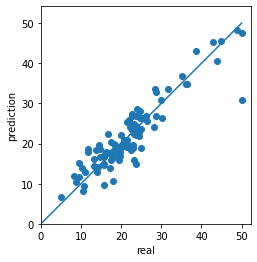

In [18]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])

## 전체 Feature를 그냥 사용하는 모델보다 더 성능이 좋은 모델을 만들 수 없을까?    

###  3. 전체 Feature를 사용하되, Outlier를 제거해 보자.

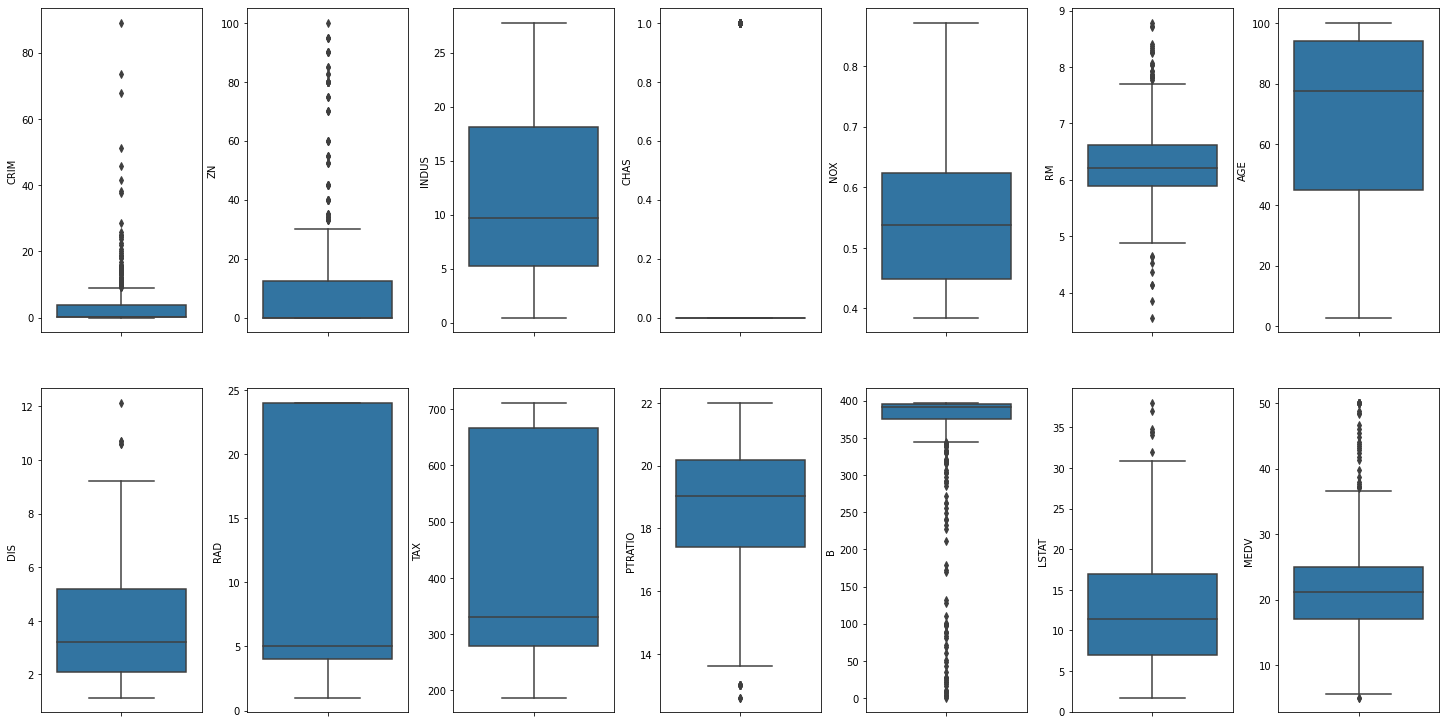

In [19]:
#아웃라이어들 보기
import scipy as sc
import seaborn as sb

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sb.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [20]:
#아웃라이어가 각 feature마다 얼마나 되는지 확인
for k, v in boston.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    percent = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
    print("Feature %s outliers = %.2f%%" % (k, percent))

Feature CRIM outliers = 13.04%
Feature ZN outliers = 13.44%
Feature INDUS outliers = 0.00%
Feature CHAS outliers = 100.00%
Feature NOX outliers = 0.00%
Feature RM outliers = 5.93%
Feature AGE outliers = 0.00%
Feature DIS outliers = 0.99%
Feature RAD outliers = 0.00%
Feature TAX outliers = 0.00%
Feature PTRATIO outliers = 2.96%
Feature B outliers = 15.22%
Feature LSTAT outliers = 1.38%
Feature MEDV outliers = 7.91%


집값(MEDV)의 아웃라이어 비율이 7.91%   
이를 제거하고 학습을 진행한다.

In [21]:
#집값 아웃라이어 제거
boston_ex_outlier = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(boston_ex_outlier))

(490, 14)


In [22]:
x = boston_ex_outlier.iloc[:,0:13]
y = boston_ex_outlier['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)  

In [23]:
#데이터 표준화 
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train =  (x_train - mean) / std
x_test =  (x_test - mean) / std

In [24]:
#모델링
#데이터의 사이즈가 작고 (총 490)개 이므로 단순하므로 은닉층의 수를 줄여 과대적합을 피한다. 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [25]:
#학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 527.4762 - mae: 21.5311 - val_loss: 467.7433 - val_mae: 20.6433
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 486.6498 - mae: 20.5974 - val_loss: 428.3583 - val_mae: 19.6841
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 441.1837 - mae: 19.5178 - val_loss: 379.7599 - val_mae: 18.4632
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 384.1700 - mae: 18.0875 - val_loss: 317.8297 - val_mae: 16.7959
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 310.5566 - mae: 16.1301 - val_loss: 244.7965 - val_mae: 14.6069
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 227.9802 - mae: 13.5622 - val_loss: 166.8118 - val_mae: 11.8394
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 147.0076 - mae: 10.5835 - val_loss: 99.2092 - val_mae: 8.8483
Epoch 8/500
13/13 [=======================

13/13 [==============================] - 0s 5ms/step - loss: 4.6679 - mae: 1.6374 - val_loss: 12.8926 - val_mae: 2.3750
Epoch 124/500
13/13 [==============================] - 0s 7ms/step - loss: 4.6423 - mae: 1.6447 - val_loss: 13.1916 - val_mae: 2.3942
Epoch 125/500
13/13 [==============================] - 0s 6ms/step - loss: 4.6319 - mae: 1.6418 - val_loss: 12.9303 - val_mae: 2.3444
Epoch 126/500
13/13 [==============================] - 0s 5ms/step - loss: 4.5841 - mae: 1.6251 - val_loss: 12.9601 - val_mae: 2.3731
Epoch 127/500
13/13 [==============================] - 0s 5ms/step - loss: 4.5728 - mae: 1.6289 - val_loss: 13.1773 - val_mae: 2.3801
Epoch 128/500
13/13 [==============================] - 0s 4ms/step - loss: 4.5599 - mae: 1.6270 - val_loss: 13.2044 - val_mae: 2.3937
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 4.5540 - mae: 1.6270 - val_loss: 13.1032 - val_mae: 2.3730
Epoch 130/500
13/13 [==============================] - 0s 4ms/step - loss: 4

In [26]:
#모델 평가
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 13.0770 - mae: 2.3789


[13.076984405517578, 2.378938674926758]

### 아웃라이어를 제거하였더니 테스트 결과가 실제값 보다 약 $2,378의 차이가 나는 모델이 생성되었다.

### 조금 더 좋아진 것을 확인

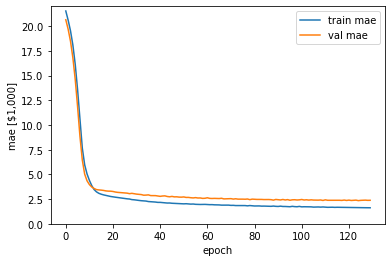

In [27]:
#학습과정 그래프
plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

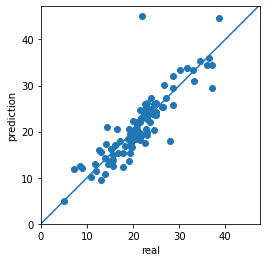

In [28]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])

## 전체 Feature를 사용하는 모델보다 더 성능이 좋은 모델을 만들 수 없을까?    

### 4. 상관관계가 높은 Feature만 사용해보자. Outlier 먼저 제거

In [29]:
#먼저 아웃라이어를 제거 하지 않은 원본 데이터의 각 Feature별 상관관계
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


아웃라이어를 제거하지 않은 데이터에서 집값(MEDV)와 절대상관계수값이 0.5이상 혹은 -0.5이하인 Feature는 RM, PTRATIO, LSTAT 총 3개뿐이다.

In [30]:
#집값 아웃라이어 제거
boston_ex_outlier = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(boston_ex_outlier))

(490, 14)


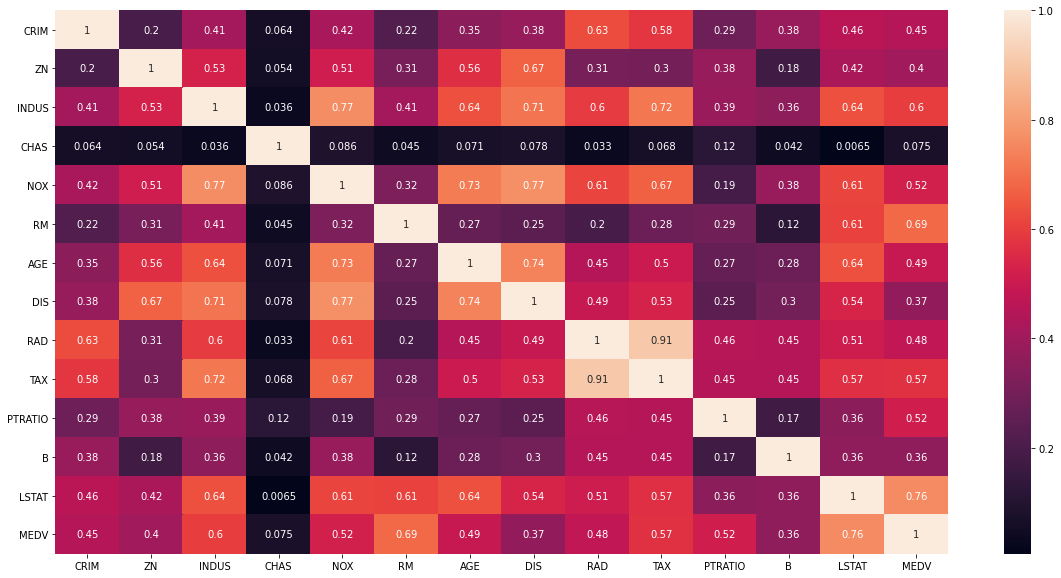

In [31]:
#아웃라이어 제거된 데이터의 각 Feature별 상관관계(절대값) 시각화
plt.figure(figsize=(20, 10))
sb.heatmap(boston_ex_outlier.corr().abs(),  annot=True)

아웃라이어를 제거하면 집값(MEDV)와 절대상관계수값이 0.5이상인 Feature는  
INDUS, NOX, RM, TAX, PTRATIO, LSTAT 총 6개가 있다.   

이 6개만 사용한 모델을 만들고 학습시켜 평가해보자.

In [32]:
x = boston_ex_outlier[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
y = boston_ex_outlier['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)  

In [33]:
#데이터 표준화 
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train =  (x_train - mean) / std
x_test =  (x_test - mean) / std

In [34]:
#모델링
#데이터의 사이즈가 작고 (총 490)개 이므로 단순하므로 은닉층의 수를 줄여 과대적합을 피한다. 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(6,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [35]:
#학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 15ms/step - loss: 515.5884 - mae: 21.2146 - val_loss: 456.9077 - val_mae: 20.3143
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 482.2631 - mae: 20.4199 - val_loss: 421.6849 - val_mae: 19.3949
Epoch 3/500
13/13 [==============================] - 0s 8ms/step - loss: 443.0372 - mae: 19.4143 - val_loss: 375.8396 - val_mae: 18.1333
Epoch 4/500
13/13 [==============================] - 0s 7ms/step - loss: 388.2156 - mae: 18.0031 - val_loss: 316.7410 - val_mae: 16.4344
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 318.5714 - mae: 16.0969 - val_loss: 247.5808 - val_mae: 14.3406
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 242.1317 - mae: 13.8707 - val_loss: 175.8043 - val_mae: 11.9705
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 163.9896 - mae: 11.4013 - val_loss: 111.8916 - val_mae: 9.4362
Epoch 8/500
13/13 [======================

Epoch 62/500
13/13 [==============================] - 0s 4ms/step - loss: 9.9595 - mae: 2.4494 - val_loss: 15.6555 - val_mae: 2.8085
Epoch 63/500
13/13 [==============================] - 0s 4ms/step - loss: 9.9107 - mae: 2.4460 - val_loss: 15.6642 - val_mae: 2.7965
Epoch 64/500
13/13 [==============================] - 0s 3ms/step - loss: 9.8209 - mae: 2.4310 - val_loss: 15.5301 - val_mae: 2.7986
Epoch 65/500
13/13 [==============================] - 0s 4ms/step - loss: 9.8352 - mae: 2.4454 - val_loss: 15.5016 - val_mae: 2.8145
Epoch 66/500
13/13 [==============================] - 0s 4ms/step - loss: 9.7505 - mae: 2.4334 - val_loss: 15.4792 - val_mae: 2.7845
Epoch 67/500
13/13 [==============================] - 0s 4ms/step - loss: 9.5890 - mae: 2.4033 - val_loss: 15.2589 - val_mae: 2.7848
Epoch 68/500
13/13 [==============================] - 0s 3ms/step - loss: 9.5149 - mae: 2.3954 - val_loss: 15.3335 - val_mae: 2.7862
Epoch 69/500
13/13 [==============================] - 0s 4ms/step - l

In [36]:
#모델 평가
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 11.9367 - mae: 2.4848


[11.936685562133789, 2.484787702560425]

### 아웃라이어를 제거한 상태에서 상관관계가 높은 Feature 6개만 선택 후 학습하였더니, 
### 테스트 결과가 실제값 보다 약 $2,484 차이가 나는 모델이 생성되었다.  

### 4번의 테스트 결과, 3번모델이 가장 성능이 좋은 모델이나, 머신이 학습을 할 때마다 오차가 있기 때문에 3번 모델이 4번모델보다 크게 차이난다고 볼 수는 없다.

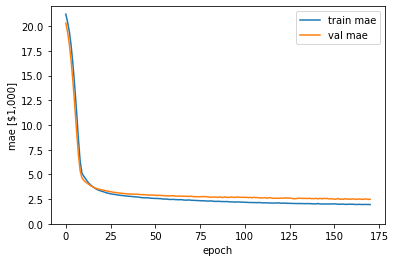

In [37]:
#학습과정 그래프
plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

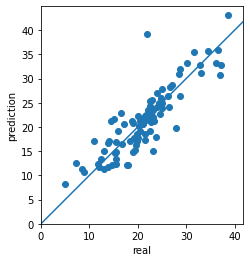

In [38]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])